In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_day = session.query(measurement.date).order_by(measurement.date.desc()).first().date
most_recent_day

'2017-08-23'

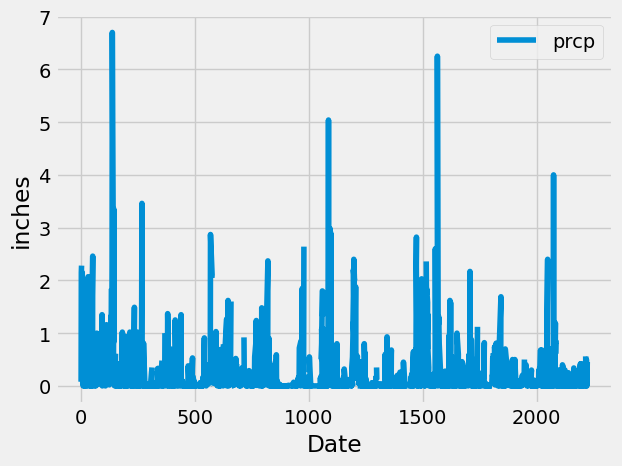

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

lastyear = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-24', '2017-08-23')).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
lastyear_df = pd.DataFrame(lastyear)
lastyear_df 
# Sort the dataframe by date
ascedning_lastyear_df= lastyear_df.sort_values(by='date', ascending = True)
ascedning_lastyear_df
# Use Pandas Plotting with Matplotlib to plot the data
ascedning_lastyear_df.plot()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
lastyear_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_no = session.query(station.station).count()
station_no 

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).order_by(func.count(measurement.station).desc()).group_by(measurement.station).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station=="USC00519281").all()
print(lowest_temp)
# Using the most active station id from the previous query, calculate the highest
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station=="USC00519281").all()
print(highest_temp)
# Using the most active station id from the previous query, calculate the average temperature.
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()
print(avg_temp)


[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


Text(0, 0.5, 'Frequency')

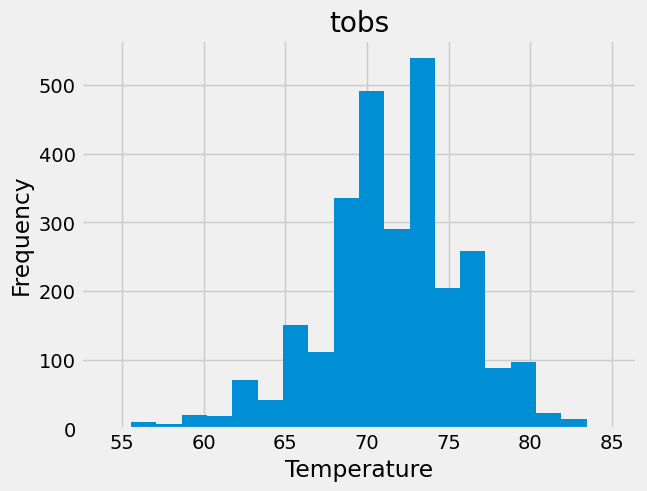

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281 = session.query(measurement.tobs).filter(measurement.station=="USC00519281").all()
most_active_temps= pd.DataFrame(USC00519281)
most_active_temps

temp_histogram = most_active_temps.hist(bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [45]:
# Close Session
session.close()